## Workshop Week 5

The goal of the workshop this week is to work through a standard Data Science workflow: exploring data, building models, making predictions, evaluating results.    We will do this in the first instance using a simple linear least squares model and will look at two datasets.  The first is the standard Iris dataset describing flowers, the second is the AutoMPG dataset. 



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

The datasets we will use are available in a number of forms.  We'll use the versions bundled with the __seaborn__ plotting library since they load as Pandas dataframes.  


In [2]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Explore the dataset

Examine the data, what are the columns? How is the spread of variables - eg. is it normally distributed?  You might want to use the [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function which shows all variables plotted against each other as a matrix.  You should also look at the means and variances of each variable.  Get to know the Pandas methods (e.g. the `describe` method) for doing this.

Your goal is to get a good feel for the data you are dealing with. Eventually you will be trying to work out what techniques you might be able to use to work with the data. For now, just get used to exploring it.


Columns in the dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

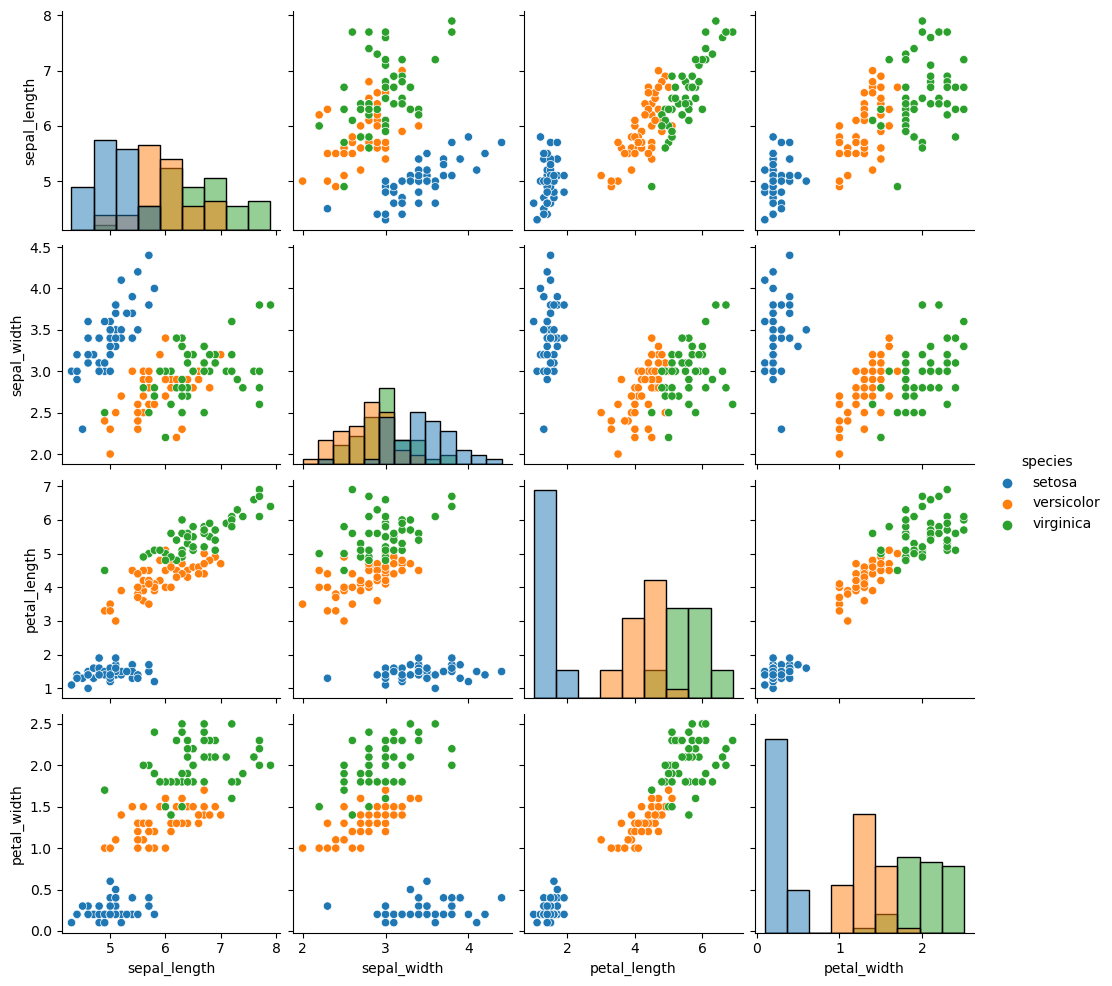

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
iris = sns.load_dataset('iris')
print("\nColumns in the dataset:")
print(iris.columns)
sns.pairplot(iris, hue='species', diag_kind='hist')

## Linear Regression

A quick search will reveal many different ways to do linear regression in Python. We will use the [sklearn LinearRegression](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) function.  The sklearn module has many standard machine learning methods so it is a good one to get used to working with.  

Linear Regression involves fitting a model of the form:

> $y = O_1X + O_2$

Where $y$ is the (numerical) variable we're trying to predict, $X$ is the vector of input variables, $O_1$ is the array of model coefficients and $O_2$ is the intercept.  In the simple case when X is one-dimensional (one input variable) then this is the forumula for a straight line with gradient $O_1$.

We will first try to predict `petal_width` from `petal_length` in the iris data.  You should look at the plot of these two variables to see that they are roughly correlated.  Here is the code using `slkearn` to do this.   We first create a linear model, then select the data we will use to train it - note that `X` (the input) is a one-column pandas dataframe while `y` (the output) is a Series.  The `fit` method is used to train the model.  The result is a set of coefficients (in this case just one) and an intercept.  


In [ ]:
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

We can now use the `predict` method to predict the value of `petal_width` from some values of `petal_length`:

In [ ]:
reg.predict(X[:3])

Prediction in this case is just using the formual $y = x * O_1 + O_2$ - confirm this is the case by evaluating some sample values from `petal_length` (use `reg.coef_` and `reg.intercept_`).

In [9]:
import seaborn as sns
import pandas as pd
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = iris[['petal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)
predictions = reg.predict(X[:3])
print("Predicted petal_width values:", predictions)
predicted_values_manual = reg.coef_ * X[:3] + reg.intercept_
print("Manually calculated predicted petal_width values:", predicted_values_manual)

y = x * [0.41575542] + -0.3630755213190291
Predicted petal_width values: [0.21898206 0.21898206 0.17740652]
Manually calculated predicted petal_width values:    petal_length
0      0.218982
1      0.218982
2      0.177407


## Evaluating the model

How well does this model fit the data? We can measure the _mean squared error_ which is based on the difference between the real and predicted values of `petal_width` (mean of the squared differences).  Another measure is $R^2$ which measures the amount of variance in the data that is explained by the model.  Smaller MSE is better.  $R^2$ close to 1 is better.

Note that here I need to convert the output Series (`y`) to an `np.array`, this is because the sklearn library really works with numpy datastructures rather than pandas Series and Dataframes. I could have used [sklearn.metrics.mean_squared_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) here but I wanted to show you that this is just a simple calculation on the results.

In [ ]:
predicted = reg.predict(X)
mse = ((np.array(y)-predicted)**2).sum()/len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)

## More Input Variables

Linear regression can work with more input variables, in this case the formula $y = x * O_1 + O_2$ becomes a matrix expression with $x$ and $O_1$ being vectors rather than scalars.  The code is almost exactly the same but we select two columns for the input array $X$.  Here we add `sepal_length`.  Note that the coefficients in the model is now a vector of two values:

In [ ]:
reg = linear_model.LinearRegression()
X = iris[['petal_length', 'sepal_length']]
y = iris['petal_width']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

You can test the model in the same way as before.  Did the model get better? 

In [10]:
import numpy as np
from sklearn.metrics import r2_score
predicted = reg.predict(X)
mse = ((np.array(y) - predicted) ** 2).sum() / len(y)
r2 = r2_score(y, predicted)
print("MSE:", mse)
print("R Squared:", r2)
X = iris[['petal_length', 'sepal_length']]
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)
predicted_updated = reg.predict(X)
mse_updated = ((np.array(y) - predicted_updated) ** 2).sum() / len(y)
r2_updated = r2_score(y, predicted_updated)
print("Updated Model MSE:", mse_updated)
print("Updated Model R Squared:", r2_updated)

MSE: 0.04206730919499318
R Squared: 0.9271098389904927
y = x * [ 0.44937611 -0.08221782] + -0.008995972698168986
Updated Model MSE: 0.04096208526408981
Updated Model R Squared: 0.9290248640257687


## Training and Testing Data

What we have done so far is to train and test the model on the same data. This is not good practice as we have no idea how good the model would be on new data.   Better practice is to split the data into two sets - training and testing data.  We build a model on the training data and test it on the test data.  

Sklearn provides a function [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to do this common task.  It returns two arrays of data. Here we ask for 20% of the data in the test set. 

In [ ]:
train, test = train_test_split(iris, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

You can now repeat the above procedure but this time train the model on the training data and evaluate on the test data.  Do the MSE and $R^2$ values change? 

**This is your first checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris, test_size=0.2, random_state=142)
X_train = train[['petal_length', 'sepal_length']]
y_train = train['petal_width']
X_test = test[['petal_length', 'sepal_length']]
y_test = test['petal_width']
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
predicted_train = reg.predict(X_train)
predicted_test = reg.predict(X_test)
mse_train = ((np.array(y_train) - predicted_train) ** 2).sum() / len(y_train)
r2_train = r2_score(y_train, predicted_train)
mse_test = ((np.array(y_test) - predicted_test) ** 2).sum() / len(y_test)
r2_test = r2_score(y_test, predicted_test)
print("Training Set MSE:", mse_train)
print("Training Set R Squared:", r2_train)
print("\nTesting Set MSE:", mse_test)
print("Testing Set R Squared:", r2_test)

Training Set MSE: 0.04305362959165906
Training Set R Squared: 0.9288709401709135

Testing Set MSE: 0.03276435877878612
Testing Set R Squared: 0.9278688806513845


# Auto MPG Dataset

This dataset contains details of different US cars with measures of various physical features and the miles-per-gallon (mpg) measure of fuel consumption.   The goal is to predict MPG from other features. 

- explore this dataset, look at summary statistics, plot the data get an idea of how the variables vary together
- split the data into training and testing sets
- use a least squares linear model to predict MPG from the **weight** of the car, evaluate the result
- add other features to the model, evaluate the results. What is the most accurate model? 
- Evaluate model performance in terms of MSE and $R^2$ scores. Comment on whether adding more features improves model's performance.

Add cells as per your need and answer all the above questions.

In [ ]:
mpg = sns.load_dataset('mpg')

In [ ]:
mpg.head()

In [15]:
from sklearn.impute import SimpleImputer
print("Missing values in the dataset:\n", mpg.isnull().sum())
X = mpg[['weight', 'acceleration', 'displacement', 'horsepower']]
y = mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
reg_multi = LinearRegression()
reg_multi.fit(X_train_imputed, y_train)
predicted_train_multi = reg_multi.predict(X_train_imputed)
predicted_test_multi = reg_multi.predict(X_test_imputed)
mse_train_multi = mean_squared_error(y_train, predicted_train_multi)
r2_train_multi = r2_score(y_train, predicted_train_multi)
mse_test_multi = mean_squared_error(y_test, predicted_test_multi)
r2_test_multi = r2_score(y_test, predicted_test_multi)
print("\nMulti-Feature Model Performance (with missing value handling):")
print("Training Set - MSE:", mse_train_multi, "R Squared:", r2_train_multi)
print("Testing Set - MSE:", mse_test_multi, "R Squared:", r2_test_multi)

Missing values in the dataset:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Multi-Feature Model Performance (with missing value handling):
Training Set - MSE: 18.861868499873513 R Squared: 0.6991546259100168
Testing Set - MSE: 14.772833475974215 R Squared: 0.7252406436872774


              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jaydon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

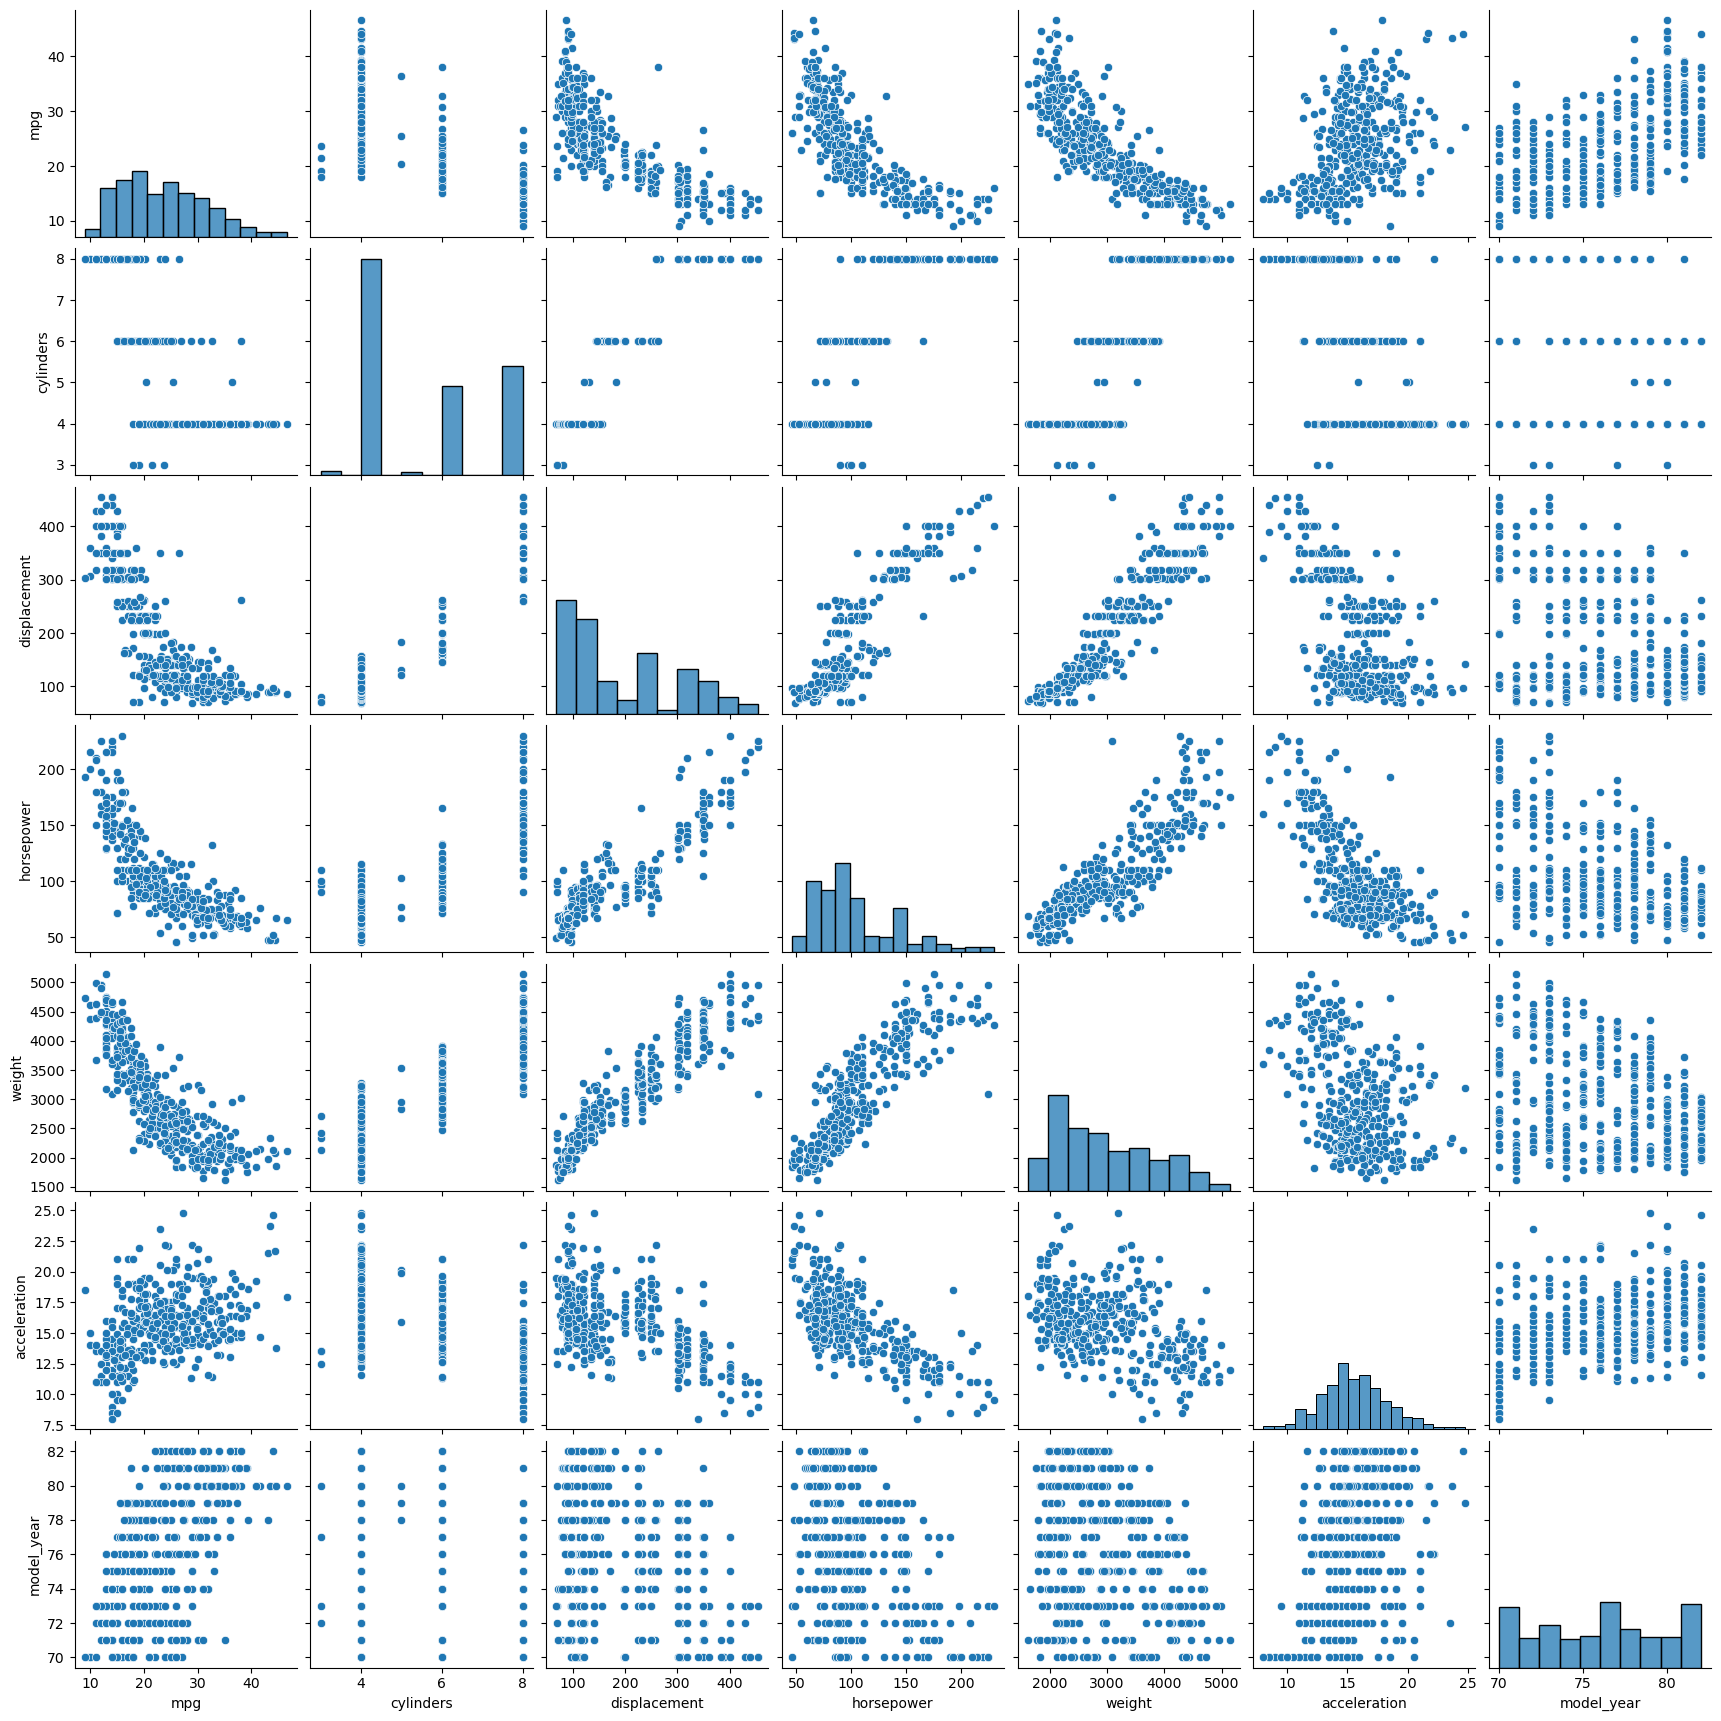

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
mpg = sns.load_dataset('mpg')
print(mpg.describe())
sns.pairplot(mpg)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X = mpg[['weight']]
y = mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 318
Testing set size: 80


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression()
reg.fit(X_train, y_train)
predicted_train = reg.predict(X_train)
predicted_test = reg.predict(X_test)
mse_train = mean_squared_error(y_train, predicted_train)
r2_train = r2_score(y_train, predicted_train)
mse_test = mean_squared_error(y_test, predicted_test)
r2_test = r2_score(y_test, predicted_test)
print("Training Set - MSE:", mse_train, "R Squared:", r2_train)
print("Testing Set - MSE:", mse_test, "R Squared:", r2_test)

Training Set - MSE: 19.781923945400308 R Squared: 0.6844798112332582
Testing Set - MSE: 14.894861064636194 R Squared: 0.722971057303075


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
mpg = sns.load_dataset('mpg')
print("Missing values in the dataset:\n", mpg.isnull().sum())
X = mpg[['weight', 'acceleration', 'displacement', 'horsepower']]
y = mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
reg_multi = LinearRegression()
reg_multi.fit(X_train_imputed, y_train)
predicted_train_multi = reg_multi.predict(X_train_imputed)
predicted_test_multi = reg_multi.predict(X_test_imputed)
mse_train_multi = mean_squared_error(y_train, predicted_train_multi)
r2_train_multi = r2_score(y_train, predicted_train_multi)
mse_test_multi = mean_squared_error(y_test, predicted_test_multi)
r2_test_multi = r2_score(y_test, predicted_test_multi)
print("\nMulti-Feature Model Performance (with missing value handling):")
print("Training Set - MSE:", mse_train_multi, "R Squared:", r2_train_multi)
print("Testing Set - MSE:", mse_test_multi, "R Squared:", r2_test_multi)

Missing values in the dataset:
 mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Multi-Feature Model Performance (with missing value handling):
Training Set - MSE: 18.861868499873513 R Squared: 0.6991546259100168
Testing Set - MSE: 14.772833475974215 R Squared: 0.7252406436872774


**This is your final checkpoint for this week**

**You have to report MSE and $R^2$ values on the training and test set. Also, provide your interpretation of results. Based on the values on training and testing data, comment whether model is overfitting?**

In [22]:
print("In summary, from the MSE and R-squared values, the linear regression model appears to perform well without significant signs of overfitting. The model shows good generalization to unseen data, as indicated by slightly better performance on the testing set compared to the training set")

In summary, from the MSE and R-squared values, the linear regression model appears to perform well without significant signs of overfitting. The model shows good generalization to unseen data, as indicated by slightly better performance on the testing set compared to the training set


## Commit your finished work on Github
Here are the list of steps you need to follow to commit your work on Github to get checkpoint mark for this week.

Once you finished all the above questions, save the notebook by clicking 'save' button in the toolbar.

You need to follow the same instructions to commit your work on your Github repository.

Step 1. Change your current directory to `practical-workshops-yourName` by doing `cd` command. You can type:
                    `cd practical-workshops-yourName`
                    
Step 2: Add your Workshop Week 5.ipynb using:
                 `git add "Workshop Week 5.ipynb`
                 
Step 3: Commit your work:
                `git commit -m "Finished Workshop 5`
                
Step 4: Push your changes:
                `git push origin master`
                
Step 5: Confirm whether your finished work is now on Github repository by signing into your Github account and clicking on your repository. You can see your added `Workshop Week 5.ipynb` file as well as your `commit message` and `time` of your commit.

Step 6: Well done!. You have now finished your Practical Workshop Week 5. Appreciate yourself.